# Earthquake Prediction Project
## Data Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

csv_name = "earthquake_data_standardized.csv"
data = pd.read_csv(csv_name)

## Multivariate Linear Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:

features = ["month", "day", "latitude", "longitude", "depth", "nst", "gap", "dmin", "rms", "horizontalError", "depthError", "magError", "magNst"]

X = data[features]
y = data["mag"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.01, random_state=42
)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Model Coefficients: [-2.80797220e-02  5.09942068e-03 -1.66439444e+00  1.05266288e+00
  2.16806474e+00  6.39812477e+00  4.55127875e-01  2.08326975e+01
  2.00761128e+01  1.99333620e+00  4.77334300e+00  1.30721967e+00
  5.46662846e+00]
Model Intercept: 2.076602679531222
Mean Squared Error: 0.348148210738161
R-squared (R2) Score: 0.43542934640043096


## Gradient Descent on Multivariate Linear Regression

In [4]:
coefficients = model.coef_
learning_rate = 0.00001
num_iterations = 1000


def cost_function(X, y, coefficients):
    predictions = np.dot(X, coefficients)
    errors = predictions - y
    cost = np.mean(errors**2)
    return cost

for iteration in range(num_iterations):
    predictions = np.dot(X, coefficients)
    gradients = 2 * np.dot(X.T, (predictions - y)) / len(y)
    coefficients -= learning_rate * gradients
    cost = cost_function(X, y, coefficients)
    print(f"Iteration {iteration + 1}: Cost = {cost}", end="\r")

model.coef_ = coefficients
model.intercept_ = 0
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Model Coefficients: [-7.26820980e-03  2.53432139e-02 -1.64533695e+00  1.02605218e+00
  2.16851150e+00  6.39994959e+00  4.68501903e-01  2.08327278e+01
  2.00761943e+01  1.99350804e+00  4.77345623e+00  1.30830074e+00
  5.46728210e+00]
Model Intercept: 0
Mean Squared Error: 4.457781927075475
R-squared (R2) Score: -6.2289122234385355


## K Nearest Neighbors

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
for k in range(1, 22, 4):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"K: {k} Mean Squared Error: {mse} R-squared (R2) Score: {r2}")

K: 1 Mean Squared Error: 0.34273062316328834 R-squared (R2) Score: 0.4442147167218631
K: 5 Mean Squared Error: 0.24295857238233007 R-squared (R2) Score: 0.6060089474058147
K: 9 Mean Squared Error: 0.23936967705562767 R-squared (R2) Score: 0.6118288393880276
K: 13 Mean Squared Error: 0.2418381515071902 R-squared (R2) Score: 0.6078258653915287
K: 17 Mean Squared Error: 0.2450421952740467 R-squared (R2) Score: 0.6026300636386475
K: 21 Mean Squared Error: 0.24836850589900952 R-squared (R2) Score: 0.597235989202278


## Decision Tree 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 0.1940149658389697
R-squared Score: 0.6904291550727164


KeyboardInterrupt: 

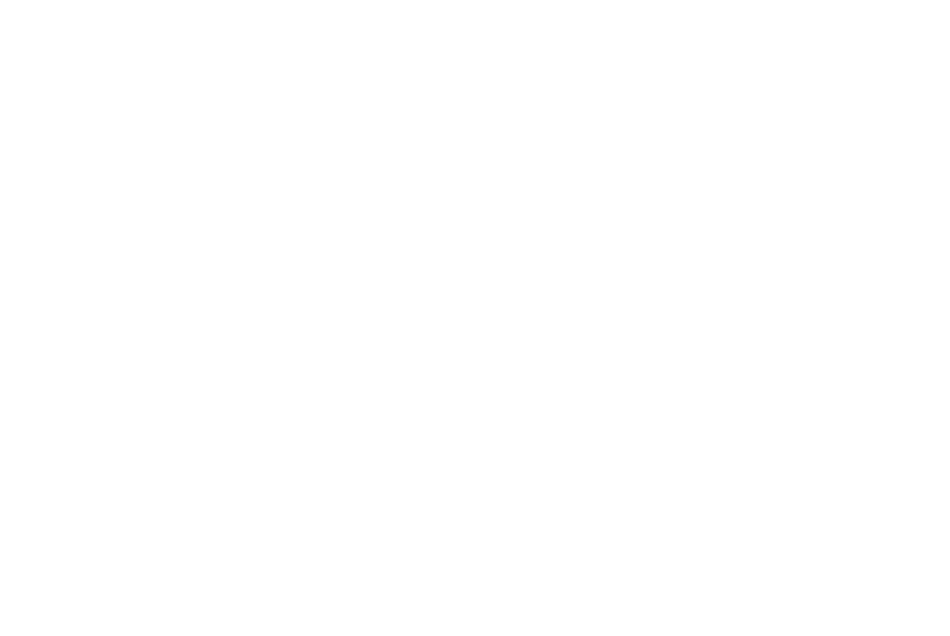

In [5]:
features = ["month", "day", "latitude", "longitude", "depth", "nst", "gap", "dmin", "rms", "horizontalError", "depthError", "magError", "magNst"]

X = data[features]
y = data["mag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeRegressor 
clf = DecisionTreeRegressor(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=features)
plt.show()


##### Gain Function

Information Gain for month: 0.008034683430722112
Information Gain for day: 0.011301747433767773
Information Gain for latitude: 3.4722646101737755
Information Gain for longitude: 3.652187002195239
Information Gain for depth: 2.184435690115257
Information Gain for nst: 0.24824846390422994
Information Gain for gap: 0.29408863320976497
Information Gain for dmin: 1.861812476072335
Information Gain for rms: 0.2421988440927505
Information Gain for horizontalError: 0.5542128451597739
Information Gain for depthError: 0.5094307535834037
Information Gain for magError: 0.4566223102456908
Information Gain for magNst: 0.2927299949000357


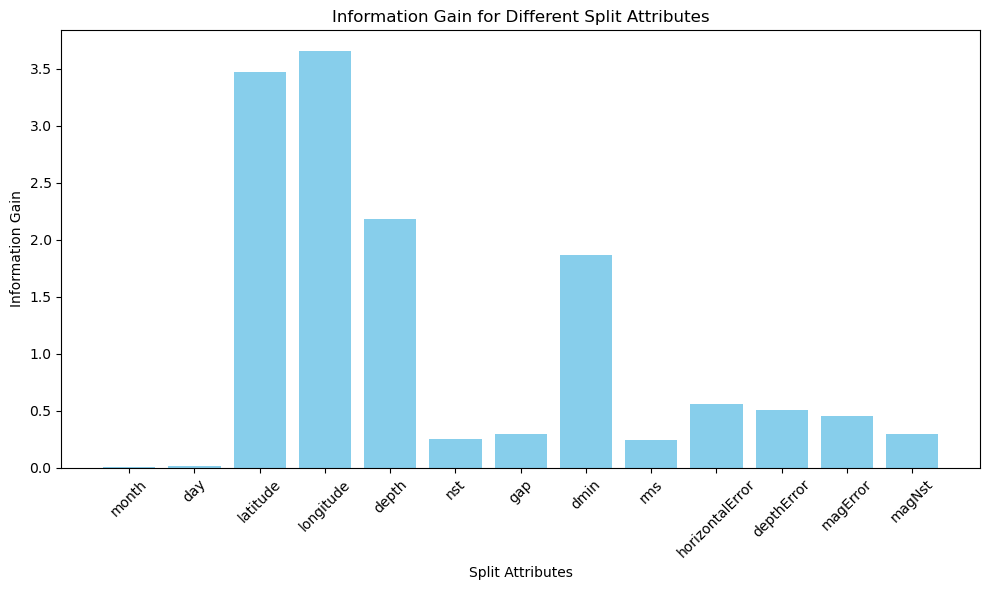

In [4]:
features = ["month", "day", "latitude", "longitude", "depth", "nst", "gap", "dmin", "rms", "horizontalError", "depthError", "magError", "magNst"]

# Entropy func
def entropy(class_probabilities):
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)

# Information gain func
def information_gain(data, split_attribute_name, target_name):
    total_entropy = entropy(data[target_name].value_counts(normalize=True))

    values = data[split_attribute_name].unique()
    weighted_entropy = 0.0
    for value in values:
        subset = data[data[split_attribute_name] == value]
        subset_prob = len(subset) / len(data)
        subset_entropy = entropy(subset[target_name].value_counts(normalize=True))
        weighted_entropy += subset_prob * subset_entropy

    return total_entropy - weighted_entropy

information_gains = {}
for split_attribute in features:
    target_attribute = 'mag'  
    gain = information_gain(data, split_attribute, target_attribute)
    information_gains[split_attribute] = gain
    print(f"Information Gain for {split_attribute}: {gain}")

plt.figure(figsize=(10, 6))
plt.bar(information_gains.keys(), information_gains.values(), color='skyblue')
plt.xlabel('Split Attributes')
plt.ylabel('Information Gain')
plt.title('Information Gain for Different Split Attributes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(csv_name)

# taget variable
X = data.drop(['mag'], axis=1)  
y = data['mag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model on Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs. Predicted Magnitude')
plt.show()

ValueError: continuous is not supported

## Neural Network 

In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
# pip install keras tensorflow

In [15]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
# pip install keras tensorflow

# taget variable
X = data.drop(['mag'], axis=1)  
y = data['mag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = Sequential()
model.add(Dense(32, input_dim=3, activation="relu"))  # Input layer with 3 features
model.add(Dense(16, activation="relu"))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=2)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Epoch 1/100


ValueError: in user code:

    File "c:\Users\Swizz\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Swizz\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Swizz\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Swizz\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Swizz\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Swizz\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 3), found shape=(2, 13)


## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv(csv_name)

features = ["month", "day", "latitude", "longitude", "depth", "nst", "gap", "dmin", "rms", "depthError", "magError", "magNst"]

x_values = data[features].values
y_values = data['mag'].values

#print(data.sample(n=15))
# plt.scatter(X, y , label = "Distribution")
# plt.xlabel("Level")
# plt.ylabel("Salary")
# plt.show()



In [ ]:
poly_model = PolynomialFeatures(degree = 3)
poly_x_values = poly_model.fit_transform(x_values)

print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')

initial values [ 3.68146667e+01 -1.21425833e+02  5.04700000e+00  8.00000000e+00
  1.36000000e+02  5.76600000e-02  9.00000000e-02  2.86000000e+00
  1.50000000e-01  1.10000000e+01]
Mapped to [ 1.00000000e+00  3.68146667e+01 -1.21425833e+02  5.04700000e+00
  8.00000000e+00  1.36000000e+02  5.76600000e-02  9.00000000e-02
  2.86000000e+00  1.50000000e-01  1.10000000e+01  1.35531968e+03
 -4.47025158e+03  1.85803623e+02  2.94517334e+02  5.00679467e+03
  2.12273368e+00  3.31332000e+00  1.05289947e+02  5.52220000e+00
  4.04961334e+02  1.47442330e+04 -6.12836181e+02 -9.71406666e+02
 -1.65139133e+04 -7.00141355e+00 -1.09283250e+01 -3.47277883e+02
 -1.82138750e+01 -1.33568417e+03  2.54722090e+01  4.03760000e+01
  6.86392000e+02  2.91010020e-01  4.54230000e-01  1.44344200e+01
  7.57050000e-01  5.55170000e+01  6.40000000e+01  1.08800000e+03
  4.61280000e-01  7.20000000e-01  2.28800000e+01  1.20000000e+00
  8.80000000e+01  1.84960000e+04  7.84176000e+00  1.22400000e+01
  3.88960000e+02  2.04000000e+0

In [ ]:
poly_model.fit(poly_x_values, y_values)

regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)


0.5125765783267451

In [ ]:
# check our accuracy for each degree, the lower the error the better!
#number_degrees = [1,2,3,4,5,6,7]
number_degrees = [1,2,3,4,5]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")